<H3>Hello, I will be using code comments instead of markdown cells</H3>
<h4>have a nice day!</h4>

In [1]:
# import needed libs
import sys
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import math

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.4                |           py36_0         877 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         961 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0

The following packages will be UPDATED:

  conda                                        4.6.3-py36_0 --> 4.6.4-py36_0
  geopy              conda-forge/linux-64::geopy-1.11.0-py~ --> conda-forge/noarch::geopy-1.18.1-py_0



geopy-1.18.1         

In [3]:
#Define Foursquare Credentials and Version and limit
CLIENT_ID = 'DY0YEQZ1Z4JHB3E2ODKZTJ31GLJ4LHWXNB5FHFDNZZ13ZH0R' # your Foursquare ID
CLIENT_SECRET = 'WBMCEP1BGLEGBHR2DZAKJZBOS5CBRL4UFOLDWAPEFKNOE23Y' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 10000

In [4]:
#NY centre coordinates
ny_lat=40.730610
ny_lng=-73.935242

#lets define radius of search
area=1213.37

#lets find radius in metres
radius = math.sqrt(area/3.14)*1000

#lets define search queries
search_query = 'Veterinarian'

print('Coordinates of the search area centre are: ', ny_lat, ny_lng, ', search radius: ', radius , 'meters')

Coordinates of the search area centre are:  40.73061 -73.935242 , search radius:  19657.659242111735 meters


In [5]:
#define search URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, ny_lat, ny_lng, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=DY0YEQZ1Z4JHB3E2ODKZTJ31GLJ4LHWXNB5FHFDNZZ13ZH0R&client_secret=WBMCEP1BGLEGBHR2DZAKJZBOS5CBRL4UFOLDWAPEFKNOE23Y&ll=40.73061,-73.935242&v=20180604&query=Veterinarian&radius=19657.659242111735&limit=10000'

In [6]:
#results in JSON format
results = requests.get(url).json()

In [7]:
#lets look at search results in JSON format
results

{'meta': {'code': 200, 'requestId': '5c6d2507dd57977bd4c8c637'},
 'response': {'venues': [{'id': '4b91517df964a520b3b233e3',
    'name': 'Steinway Veterinarian',
    'location': {'address': '32-41 Steinway St #R',
     'lat': 40.75782592499892,
     'lng': -73.91970744124593,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.75782592499892,
       'lng': -73.91970744124593}],
     'distance': 3300,
     'postalCode': '11103',
     'cc': 'US',
     'city': 'Astoria',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['32-41 Steinway St #R',
      'Astoria, NY 11103',
      'United States']},
    'categories': [{'id': '4d954af4a243a5684765b473',
      'name': 'Veterinarian',
      'pluralName': 'Veterinarians',
      'shortName': 'Veterinarians',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_veterinarian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1550656775',
    'hasPerk': False},

In [47]:
# assign relevant part of JSON to italian venues
venues = results['response']['venues']

# tranform venues into a dataframe
venues = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in venues.columns if col.startswith('location.')] + ['id']
venues_filter = venues.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
venues_filter['categories'] = venues_filter.apply(get_category_type, axis=1)

# clean column names by keeping only last term
venues_filter.columns = [column.split('.')[-1] for column in venues_filter.columns]

#lets see what we got here
print('DF shape: ', venues_filter.shape)
venues_filter.head()

DF shape:  (23, 15)


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Steinway Veterinarian,Veterinarian,32-41 Steinway St #R,US,Astoria,United States,NaN,3300,"[32-41 Steinway St #R, Astoria, NY 11103, Unit...","[{'label': 'display', 'lat': 40.75782592499892...",40.757826,-73.919707,11103,NY,4b91517df964a520b3b233e3
1,A Veterinarian,Veterinarian,NaN,US,Middle Village,United States,NaN,5526,"[Middle Village, NY 11379, United States]","[{'label': 'display', 'lat': 40.71308945030248...",40.713089,-73.873949,11379,NY,4cb86d6ea33bb1f713eb80fd
2,The Village Veterinarian,Veterinarian,340 E 11th St,US,New York,United States,btwn 1st & 2nd Ave,4158,"[340 E 11th St (btwn 1st & 2nd Ave), New York,...","[{'label': 'display', 'lat': 40.72961372822549...",40.729614,-73.984522,10003,NY,4c3c83e04bc9a5932fbcd271
3,steinway court veterinarian steinway court vet...,Pet Service,42-06 Steinway Street,US,Astoria,United States,NaN,3286,"[42-06 Steinway Street, Astoria, NY, United St...","[{'label': 'display', 'lat': 40.75765723326018...",40.757657,-73.919635,NaN,NY,55043316498e6198e7f41f46
4,"Dr. Pet Daddy Veterinarian, PC",Pet Store,27-15 24th Ave,US,Astoria,United States,NaN,5022,"[27-15 24th Ave, Astoria, NY 11102, United Sta...","[{'label': 'display', 'lat': 40.77362398634759...",40.773624,-73.917280,11102,NY,56324b4d498eb5f26f97403d


In [9]:
#lets see what areas are in the data frame
venues_filter.city.unique()

array(['Astoria', 'Middle Village', 'New York', 'Bayside', 'Jamaica',
       'Brooklyn', 'Jersey City', 'Bronx', 'Montclair', 'Staten Island',
       'New Hyde Park'], dtype=object)

city
Astoria           3
Bayside           2
Bronx             1
Brooklyn          4
Jamaica           1
Jersey City       1
Middle Village    1
Montclair         1
New Hyde Park     1
New York          7
Staten Island     1
Name: name, dtype: int64


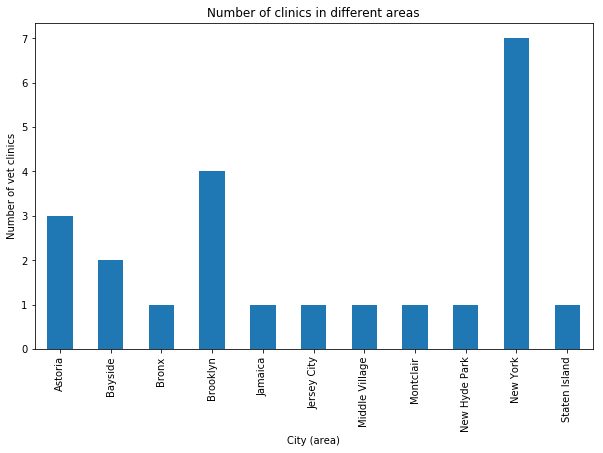

In [10]:
#lets visualize number of clinics in different areas
df_areas = venues_filter.groupby('city')['name'].nunique()
print(df_areas)

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


df_areas.plot(kind='bar', figsize=(10, 6))

plt.xlabel('City (area)')
plt.ylabel('Number of vet clinics')
plt.title('Number of clinics in different areas')

plt.show()

In [11]:
#we can see that in our list there are some wrong venues (for example "Port Veterinarian Airport Terminal") - we need to get rid of them!
venues_filter = venues_filter.drop(venues_filter[venues_filter.categories !='Veterinarian'].index)

#lets also drop venues from the outside of New York State
venues_filter = venues_filter.drop(venues_filter[venues_filter.state !='NY'].index)

#now lets get rid of clinics which do not belong to New York City - knowing the fact that there are only Bronx, Brooklyn, Manhattan, New York, Queens and Staten Island are the right cities for NYC.
venues_filter = venues_filter.loc[(venues_filter['city']=='Bronx')|(venues_filter['city']=='Brooklyn')|(venues_filter['city']=='Manhattan')|(venues_filter['city']=='New York')|(venues_filter['city']=='Queens')|(venues_filter['city']=='Staten Island')]

#lets see the "clean" result
venues_filter

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
2,The Village Veterinarian,Veterinarian,340 E 11th St,US,New York,United States,btwn 1st & 2nd Ave,4158,"[340 E 11th St (btwn 1st & 2nd Ave), New York,...","[{'label': 'display', 'lat': 40.72961372822549...",40.729614,-73.984522,10003,NY,4c3c83e04bc9a5932fbcd271
5,Dr. Cindy Bressler House Call Veterinarian NYC...,Veterinarian,170 East 66th Street,US,New York,United States,3rd ave and Lexington Ave,4446,[170 East 66th Street (3rd ave and Lexington A...,"[{'label': 'display', 'lat': 40.76297490010358...",40.762975,-73.966141,10065,NY,54e1f61c498eee7bd0893ee5
6,City Veterinarian,Veterinarian,220 West ZEnd,US,New York,United States,Broadway,6707,"[220 West ZEnd (Broadway), New York, NY 10023,...","[{'label': 'display', 'lat': 40.77900044445319...",40.779000,-73.982633,10023,NY,4b8abb03f964a520107d32e3
7,VetPronto - Mobile Veterinarians,Veterinarian,1461 1st Ave,US,New York,United States,NaN,4744,"[1461 1st Ave, New York, NY 10075, United States]","[{'label': 'display', 'lat': 40.77070601, 'lng...",40.770706,-73.954305,10075,NY,5ab6c4ac9411f2343fa8168f
8,Lenox Hill Veterinarians,Veterinarian,204 E 76th St,US,New York,United States,NaN,5000,"[204 E 76th St, New York, NY 10021, United Sta...","[{'label': 'display', 'lat': 40.771973, 'lng':...",40.771973,-73.958382,10021,NY,4bc08ba9920eb713e10b192c
10,Symphony Vet Center,Veterinarian,170 W 96th St,US,New York,United States,Amsterdam,7621,"[170 W 96th St (Amsterdam), New York, NY 10025...","[{'label': 'display', 'lat': 40.79384398521261...",40.793844,-73.969912,10025,NY,4e2af41da809f1b1640a346b
12,MVA Veterinarian,Veterinarian,NaN,US,Brooklyn,United States,NaN,15466,"[Brooklyn, NY 11223, United States]","[{'label': 'display', 'lat': 40.59537652752679...",40.595377,-73.977255,11223,NY,50c360bbe4b0e0fa34731cf9
13,Park Slope Veterinary Center,Veterinarian,639 4th Ave,US,Brooklyn,United States,19th,8960,"[639 4th Ave (19th), Brooklyn, NY 11232, Unite...","[{'label': 'display', 'lat': 40.66377523530654...",40.663775,-73.994416,11232,NY,4d948000af67370459027d09
14,Carnegie Hill Veterinarians,Veterinarian,1707 3rd Ave,US,New York,United States,E96th,6161,"[1707 3rd Ave (E96th), New York, NY 10128, Uni...","[{'label': 'display', 'lat': 40.78492102996309...",40.784921,-73.949326,10128,NY,53c54703498efa2cc64107e7
15,Call Ahead Vet,Veterinarian,654 5th Ave,US,Brooklyn,United States,19th and 20th Street,8988,"[654 5th Ave (19th and 20th Street), Brooklyn,...","[{'label': 'display', 'lat': 40.66250121864333...",40.662501,-73.992441,11215,NY,4ea88fe46c253859bb057061


city
Bronx            1
Brooklyn         4
New York         7
Staten Island    1
Name: name, dtype: int64


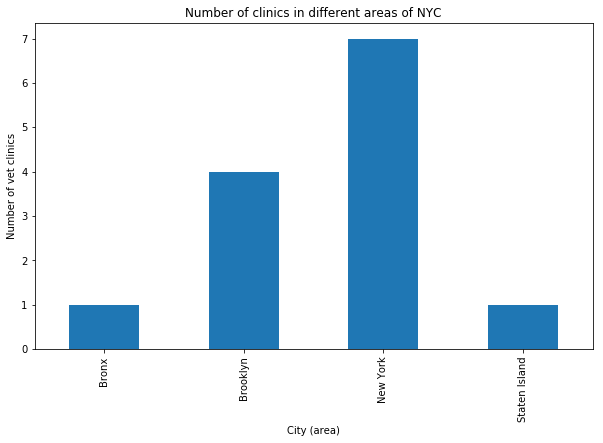

In [12]:
#lets visualize number of clinics in different areas from cleaned data frame
df_areas = venues_filter.groupby('city')['name'].nunique()
print(df_areas)

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


df_areas.plot(kind='bar', figsize=(10, 6))

plt.xlabel('City (area)')
plt.ylabel('Number of vet clinics')
plt.title('Number of clinics in different areas of NYC')

plt.show()

In [52]:
#lets group and fetch only the necessary info
venues_filter= venues_filter[['name','categories','address','city','lat','lng','id']]

#reset indexes
venues_filter = venues_filter.reset_index(drop=True)

#show result
venues_filter

,name,categories,address,city,lat,lng,id
0,Steinway Veterinarian,Veterinarian,32-41 Steinway St #R,Astoria,40.757826,-73.919707,4b91517df964a520b3b233e3
1,A Veterinarian,Veterinarian,NaN,Middle Village,40.713089,-73.873949,4cb86d6ea33bb1f713eb80fd
2,The Village Veterinarian,Veterinarian,340 E 11th St,New York,40.729614,-73.984522,4c3c83e04bc9a5932fbcd271
3,steinway court veterinarian steinway court vet...,Pet Service,42-06 Steinway Street,Astoria,40.757657,-73.919635,55043316498e6198e7f41f46
4,"Dr. Pet Daddy Veterinarian, PC",Pet Store,27-15 24th Ave,Astoria,40.773624,-73.917280,56324b4d498eb5f26f97403d
5,Dr. Cindy Bressler House Call Veterinarian NYC...,Veterinarian,170 East 66th Street,New York,40.762975,-73.966141,54e1f61c498eee7bd0893ee5
6,City Veterinarian,Veterinarian,220 West ZEnd,New York,40.779000,-73.982633,4b8abb03f964a520107d32e3
7,VetPronto - Mobile Veterinarians,Veterinarian,1461 1st Ave,New York,40.770706,-73.954305,5ab6c4ac9411f2343fa8168f
8,Lenox Hill Veterinarians,Veterinarian,204 E 76th St,New York,40.771973,-73.958382,4bc08ba9920eb713e10b192c
9,Bayside Veterinarian,Veterinarian,Bell Blvd,Bayside,40.767413,-73.777252,4ff0bd10e4b0581584aa40b2


<h2>So, now I have all the neccessary info for my research!</h2>

<h2>Part 2</h2>

In [60]:
# generate map centered around the search area centre
venues_map = folium.Map(location=[ny_lat,ny_lng], zoom_start=12) 

# add a red circle marker to represent the search area centre
folium.features.CircleMarker(
    [ny_lat, ny_lng],
    radius=3,
    color='black',
    popup='Centre of NYC',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
).add_to(venues_map)

# add the clinic venues as blue circle markers
for lat, lng, label in zip(venues_filter.lat, venues_filter.lng, venues_filter.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(venues_map)

# display map
venues_map

<p>So, on map we can see 2 clusters of clinics: on Manhattan island and in Brooklyn, near Green-Wood Cemetery.</p>
<p>Manhattan is too expensive for me, so it will be the best idea to rent a room in Brooklyn, near Green-Wood Cemetery.</p>
<p>Lets find what hotel do we have there</p>


In [34]:
#Green-Wood Cemetery centre coordinates
GWC_lat=40.6545228
GWC_lng=-73.9899898


#lets define radius as 2000 metres
radius2 = 2000

#lets define search query - will search for hotels
search_query2 = 'hotel'

#define search URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, GWC_lat, GWC_lng, VERSION, search_query2, radius2, LIMIT)

#results in JSON format
results2 = requests.get(url).json()

# assign relevant part of JSON to italian venues
venues_hotel = results2['response']['venues']

# tranform venues into a dataframe
venues_hotel = json_normalize(venues_hotel)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in venues_hotel.columns if col.startswith('location.')] + ['id']
venues2_filter = venues_hotel.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venues_hotel.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
venues2_filter['categories'] = venues2_filter.apply(get_category_type, axis=1)

# clean column names by keeping only last term
venues2_filter.columns = [column.split('.')[-1] for column in venues2_filter.columns]

#lets see what we got here
print('DF shape: ', venues2_filter.shape)
venues2_filter

DF shape:  (19, 15)


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,"Brooklyn Way Hotel, BW Premier Collection",Hotel,764 4th Ave,US,Brooklyn,United States,at 25th St,962,"[764 4th Ave (at 25th St), Brooklyn, NY 11232,...","[{'label': 'display', 'lat': 40.66020905158447...",40.660209,-73.998572,11232,NY,4cf3c1946195721e6e904ec1
1,hotel le bleu,Hotel,370 4th Ave,US,Brooklyn,United States,5th St,2080,"[370 4th Ave (5th St), Brooklyn, NY 11215, Uni...","[{'label': 'display', 'lat': 40.67307905184227...",40.673079,-73.987098,11215,NY,49c3c85df964a52076561fe3
2,Hotel BPM Brooklyn,Hotel,139 33rd St,US,Brooklyn,United States,at 4th Ave.,1160,"[139 33rd St (at 4th Ave.), Brooklyn, NY 11232...","[{'label': 'display', 'lat': 40.65651805231051...",40.656518,-74.003472,11232,NY,4fd6211a7b0c4fe0bedb171d
3,Park House Hotel,Hotel,1206 48th St,US,Brooklyn,United States,12th Ave,2017,"[1206 48th St (12th Ave), Brooklyn, NY 11219, ...","[{'label': 'display', 'lat': 40.63659108883795...",40.636591,-73.993497,11219,NY,50ef0efb3950be41c0dc99ce
4,Wyndham Garden Hotel,Hotel,457 39th St,US,Brooklyn,United States,Sunset Park,1259,"[457 39th St (Sunset Park), Brooklyn, NY 11232...","[{'label': 'display', 'lat': 40.65180128849514...",40.651801,-74.004461,11232,NY,55fd42dd498e4df93558ce8e
5,Phoenix Hotel,Hotel,517 39th St,US,New York,United States,NaN,1183,"[517 39th St, New York, NY 11232, United States]","[{'label': 'display', 'lat': 40.651031, 'lng':...",40.651031,-74.003220,11232,NY,57e05d18498ec840d74f88d1
6,Sunny 39 Hotel,Hotel,NaN,US,Brooklyn,United States,NaN,1153,"[Brooklyn, NY 11232, United States]","[{'label': 'display', 'lat': 40.65123105311520...",40.651231,-74.002937,11232,NY,4ec84ede6c251306cc7d9d0f
7,Kings Hotel,Hotel,820 39th St,US,Brooklyn,United States,NaN,1030,"[820 39th St, Brooklyn, NY 11232, United States]","[{'label': 'display', 'lat': 40.64683396158509...",40.646834,-73.996779,11232,NY,4bc3b306dce4eee15db7719d
8,Le Hotel Delux De Jer,Concert Hall,3rd Ave 90's,US,Brooklyn,United States,NaN,1592,"[3rd Ave 90's, Brooklyn, NY 11209, United States]","[{'label': 'display', 'lat': 40.668543, 'lng':...",40.668543,-73.993761,11209,NY,4c52434294790f4750cc63a2
9,Mosaic Hotel,Hotel,1579 44th St,US,Brooklyn,United States,15 Ave,1469,"[1579 44th St (15 Ave), Brooklyn, NY 11219, Un...","[{'label': 'display', 'lat': 40.64292045735453...",40.642920,-73.981703,11219,NY,4e89c1c2775b4a1123ad9320


In [35]:
#we can see that in our list there are some wrong venues (for example "Bar") - we need to get rid of them!
venues2_filter = venues2_filter.drop(venues2_filter[venues2_filter.categories !='Hotel'].index)

#lets group and fetch only the necessary info
venues2_filter= venues2_filter[['name','categories','address','city','lat','lng','id']]

#reset indexes
venues2_filter = venues2_filter.reset_index(drop=True)

#show result
venues2_filter

,name,categories,address,city,lat,lng,id
0,"Brooklyn Way Hotel, BW Premier Collection",Hotel,764 4th Ave,Brooklyn,40.660209,-73.998572,4cf3c1946195721e6e904ec1
1,hotel le bleu,Hotel,370 4th Ave,Brooklyn,40.673079,-73.987098,49c3c85df964a52076561fe3
2,Hotel BPM Brooklyn,Hotel,139 33rd St,Brooklyn,40.656518,-74.003472,4fd6211a7b0c4fe0bedb171d
3,Park House Hotel,Hotel,1206 48th St,Brooklyn,40.636591,-73.993497,50ef0efb3950be41c0dc99ce
4,Wyndham Garden Hotel,Hotel,457 39th St,Brooklyn,40.651801,-74.004461,55fd42dd498e4df93558ce8e
5,Phoenix Hotel,Hotel,517 39th St,New York,40.651031,-74.003220,57e05d18498ec840d74f88d1
6,Sunny 39 Hotel,Hotel,NaN,Brooklyn,40.651231,-74.002937,4ec84ede6c251306cc7d9d0f
7,Kings Hotel,Hotel,820 39th St,Brooklyn,40.646834,-73.996779,4bc3b306dce4eee15db7719d
8,Mosaic Hotel,Hotel,1579 44th St,Brooklyn,40.642920,-73.981703,4e89c1c2775b4a1123ad9320
9,"Industry City Hotel, an Ascend Hotel Collectio...",Hotel,135 32nd St,Brooklyn,40.657199,-74.002746,5c4bf2492db4a9002c6a342c


In [49]:
# generate map centered around the search area centre
venues2_map = folium.Map(location=[GWC_lat,GWC_lng], zoom_start=15) 

# add a red circle marker to represent the search area centre
folium.features.CircleMarker(
    [GWC_lat, GWC_lng],
    radius=6,
    color='black',
    popup='Green-Wood Cementery',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
).add_to(venues_map)

# add the hotel venues as blue circle markers
for lat, lng, label in zip(venues2_filter.lat, venues2_filter.lng, venues2_filter.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='red',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(venues2_map)

    
# add the clinic venues as blue circle markers
for lat, lng, label in zip(venues_filter.lat, venues_filter.lng, venues_filter.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=6,
        color='green',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(venues2_map)
    
    
# display map
venues2_map

<p>"Brooklyn Way Hotel, BW Premier Collection" seems to be the best choice, lets see its rating</p>

In [50]:
 # ID of "Brooklyn Way Hotel, BW Premier Collection" 
venue_id = '4cf3c1946195721e6e904ec1'
url3 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result3 = requests.get(url3).json()
try:
    print(result3['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.5


<p>This is a mediocre rating, so lets examine the second nearest to vet clinics hotel - "hotel le bleu"</p>

In [51]:
venue_id = '49c3c85df964a52076561fe3'
url4 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
result4 = requests.get(url4).json()
try:
    print(result4['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.8


<p>6.8 is better than 6.5, so I decide to stop here and choose "hotel le bleu" as the place to stay in NYC.</p>